Q. Perform feature extraction on iris dataset using LDA,PCA,TSNE and SVD.
Reduce it to :
i. 2 features
ii. 3 features

and apply cross validation in each case and report your inference

In [22]:
import pandas as pd
from sklearn.datasets import load_iris

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Loading the dataset
iris = load_iris()

iris_df = pd. DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target

print("Column names :", iris_df.columns)
print()
print("First 5 rows of the dataset :\n", iris_df.head())

Column names: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

First 5 rows of the dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


# Perform Feature Extraction

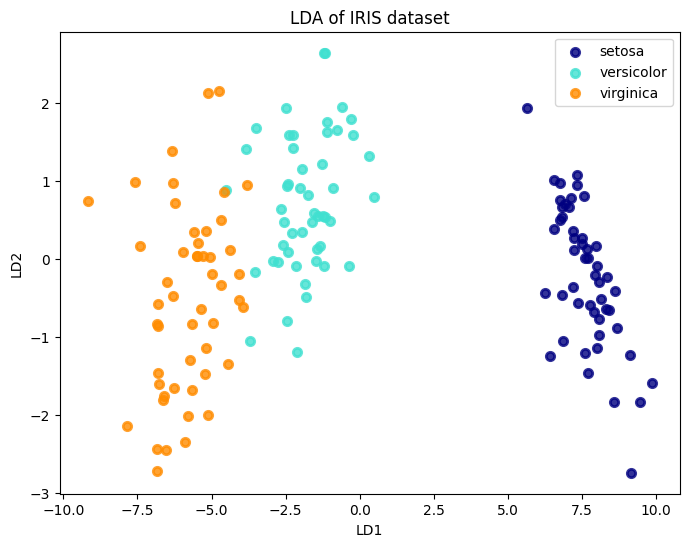

In [40]:

# LDA - 2 features
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

X = iris.data
y = iris.target

lda = LinearDiscriminantAnalysis(n_components = 2)
X_lda = lda.fit_transform(X,y)

# Visualisation

# Step 4: Visualize the results
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

In [41]:

clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(clf, X_lda, y, cv=5)

# Report the inference
print("Cross-validated accuracy scores :", scores)
print("Mean accuracy :", scores.mean())
print("Standard deviation of accuracy :", scores.std())

Cross-validated accuracy scores : [1.         1.         0.96666667 0.93333333 1.        ]
Mean accuracy : 0.9800000000000001
Standard deviation of accuracy : 0.02666666666666666


In [11]:
# LDA - 3 features
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

X = iris.data
y = iris.target

lda = LinearDiscriminantAnalysis(n_components = 3)
X_lda = lda.fit_transform(X,y)

# Visualisation


ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

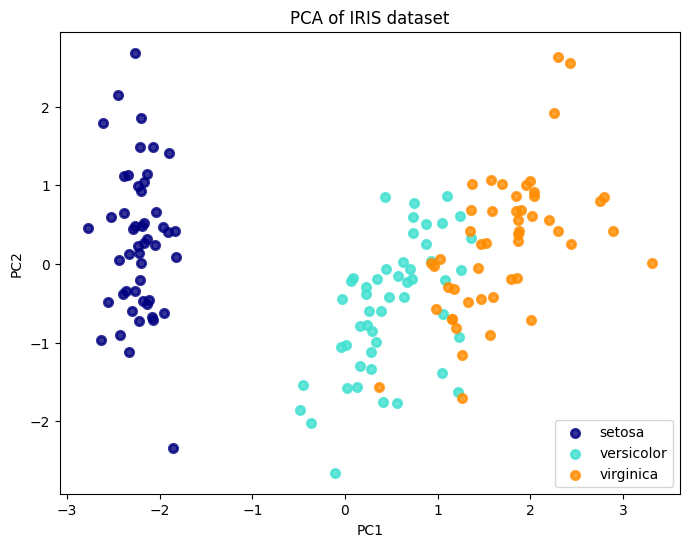

In [12]:
# PCA - 2 features

from sklearn.decomposition import PCA

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation

plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [28]:
clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(clf, X_pca, y, cv=5)

# Report the inference
print("Cross-validated accuracy scores :", scores)
print("Mean accuracy :", scores.mean())
print("Standard deviation of accuracy :", scores.std())

Cross-validated accuracy scores : [0.96666667 1.         0.93333333 0.9        1.        ]
Mean accuracy : 0.9600000000000002
Standard deviation of accuracy : 0.038873012632301994


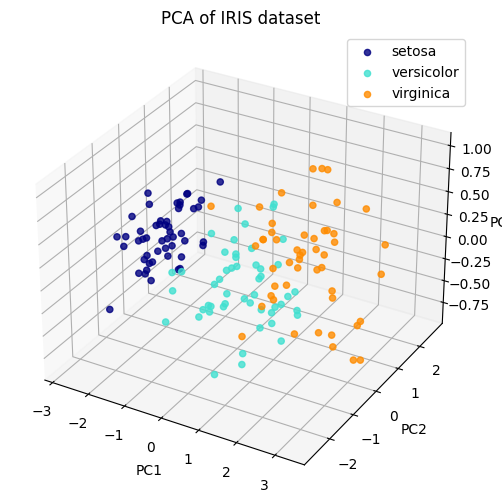

In [30]:
# PCA - 3 features

from sklearn.decomposition import PCA

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled)

# Visualisation

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for color, i, target_name in zip(['navy', 'turquoise', 'darkorange'], [0, 1, 2], iris.target_names):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2], color=color, alpha=.8,
                label=target_name)
ax.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title('PCA of IRIS dataset')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [31]:
clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(clf, X_pca, y, cv=5)

# Report the inference
print("Cross-validated accuracy scores :", scores)
print("Mean accuracy :", scores.mean())
print("Standard deviation of accuracy :", scores.std())

Cross-validated accuracy scores : [0.96666667 1.         0.93333333 0.9        1.        ]
Mean accuracy : 0.9600000000000002
Standard deviation of accuracy : 0.038873012632301994


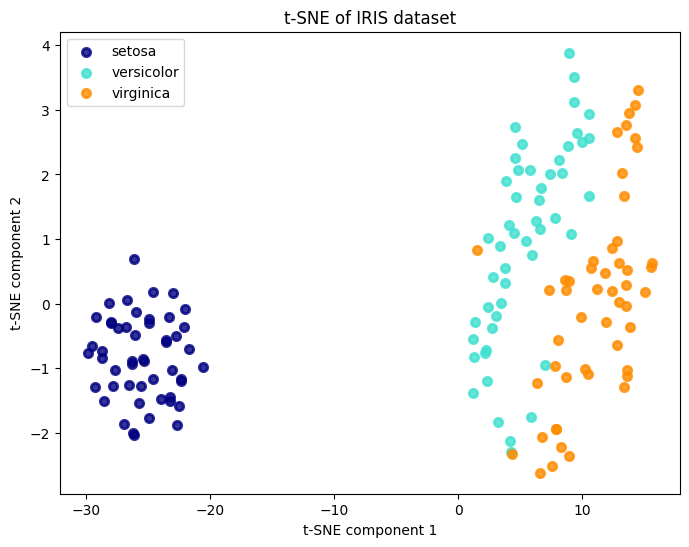

In [32]:
#  TSNE - 2 features

from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualisation

plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE of IRIS dataset')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()


In [33]:
clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(clf, X_tsne, y, cv=5)

print("Cross-validated accuracy scores :", scores)
print("Mean accuracy :", scores.mean())
print("Standard deviation of accuracy :", scores.std())

Cross-validated accuracy scores : [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean accuracy : 0.9533333333333334
Standard deviation of accuracy : 0.03399346342395189


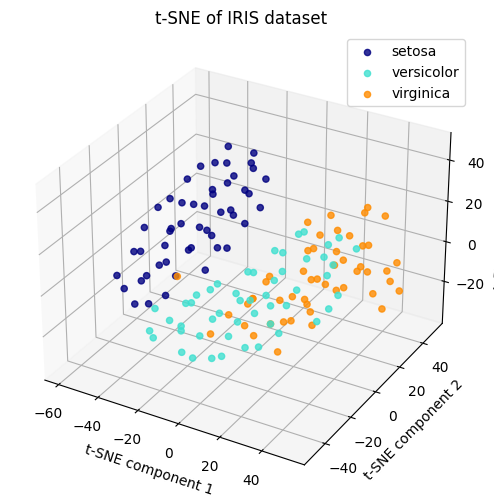

In [34]:
#  TSNE - 3 features

from sklearn.manifold import TSNE


tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualisation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for color, i, target_name in zip(['navy', 'turquoise', 'darkorange'], [0, 1, 2], iris.target_names):
    ax.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], X_tsne[y == i, 2], color=color, alpha=.8,
                label=target_name)
ax.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title('t-SNE of IRIS dataset')
ax.set_xlabel('t-SNE component 1')
ax.set_ylabel('t-SNE component 2')
ax.set_zlabel('t-SNE component 3')
plt.show()

In [35]:
clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(clf, X_tsne, y, cv=5)

print("Cross-validated accuracy scores :", scores)
print("Mean accuracy :", scores.mean())
print("Standard deviation of accuracy :", scores.std())

Cross-validated accuracy scores : [0.96666667 0.96666667 0.9        0.9        1.        ]
Mean accuracy : 0.9466666666666667
Standard deviation of accuracy : 0.039999999999999994


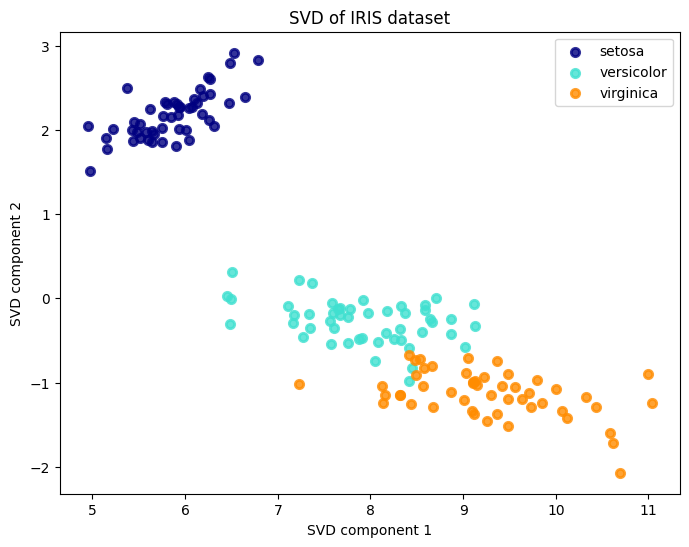

In [36]:
# SVD - 2 features

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Visualisation

plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_svd[y == i, 0], X_svd[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('SVD of IRIS dataset')
plt.xlabel('SVD component 1')
plt.ylabel('SVD component 2')
plt.show()

In [39]:
# Apply cross validation

clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(clf, X_svd, y, cv=5)

print("Cross-validated accuracy scores :", scores)
print("Mean accuracy :", scores.mean())
print("Standard deviation of accuracy :", scores.std())

print("Cross-validated accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validated accuracy scores : [0.93333333 1.         0.93333333 0.93333333 1.        ]
Mean accuracy : 0.96
Standard deviation of accuracy : 0.03265986323710904
Cross-validated accuracy: 0.96 (+/- 0.07)


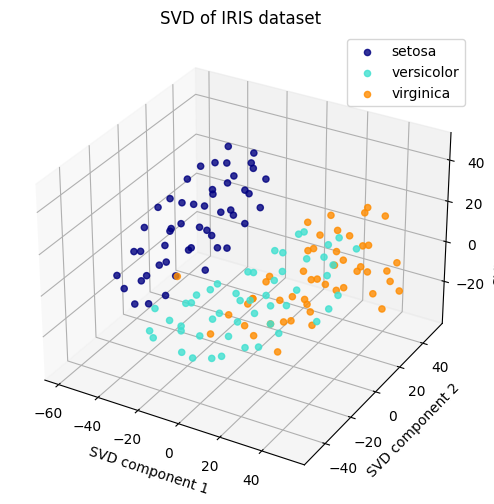

In [20]:
# SVD - 3 features

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Visualisation

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for color, i, target_name in zip(['navy', 'turquoise', 'darkorange'], [0, 1, 2], iris.target_names):
    ax.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], X_tsne[y == i, 2], color=color, alpha=.8,
                label=target_name)
ax.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title('SVD of IRIS dataset')
ax.set_xlabel('SVD component 1')
ax.set_ylabel('SVD component 2')
ax.set_zlabel('SVD component 3')
plt.show()

In [38]:
# Apply cross validation

clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(clf, X_svd, y, cv=5)
print("Cross-validated accuracy scores :", scores)
print("Mean accuracy :", scores.mean())
print("Standard deviation of accuracy :", scores.std())
print("Cross-validated accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validated accuracy scores : [0.93333333 1.         0.93333333 0.93333333 1.        ]
Mean accuracy : 0.96
Standard deviation of accuracy : 0.03265986323710904
Cross-validated accuracy: 0.96 (+/- 0.07)
